# SESSION 3: Types, type inference and stability

**OBJECTIVE: Demonstrate the dynamic programming features of Julia**
\begin{itemize}
\item KR1: Shown or demonstrated the hierarchy of Julia’s type hierarchy using the command `subtypes()`. Start from `Number` and use `subtypes()` to explore from \textit{abstract types} down  to \textit{specific types}. Use `supertype()` to determine the  abstract type.
\itemKR2: Implemented and used at least one own composite type via `struct`. Generate two more versions that are mutable type and type-parametrized of the custom-built type.
\item KR3: Demonstrated type inference in Julia. Generator expressions may be used for this.
\item KR4: Created a function with inherent type-instability. Create a version of the function with fixed  issues.
\item KR5: Demonstration of how `@code_warntype` can be useful in detecting type-instabilities.
\item KR6: Demonstration of how `Arrays` containing ambiguous/abstract types often results to slow execution of codes. The `BenchmarkTools` may be useful in this part.
\end{itemize}

## KR1

**Shown or demonstrated the hierarchy of Julia’s type hierarchy using the command subtypes(). Start from Number and use subtypes() to explore from \textit{abstract types} down  to \textit{specific types}. Use supertype() to determine the  abstract type.**

In [133]:
alltypes = subtypes(Any);
println("There are $(length(alltypes)) types in Julia!")

There are 706 types in Julia!


In [134]:
alltypes

706-element Vector{Any}:
 AbstractArray
 AbstractBackend
 AbstractChannel
 AbstractChar
 AbstractDict
 AbstractDisplay
 AbstractLayout
 AbstractMatch
 AbstractPattern
 AbstractPlot
 AbstractSet
 AbstractString
 Animation
 ⋮
 TypeVar
 UndefInitializer
 Val
 Vararg
 VecElement
 VersionNumber
 VolleyballPlayer
 VolleyballStats
 WeakRef
 ZMQ.Context
 ZMQ.Socket
 ZMQ._Message

### `subtypes()`

In [135]:
?subtypes();

In [136]:
subtypes(Number)

2-element Vector{Any}:
 Complex
 Real

In [137]:
subtypes(Real)

7-element Vector{Any}:
 AbstractFloat
 AbstractIrrational
 FixedPointNumbers.FixedPoint
 Integer
 Rational
 StatsBase.PValue
 StatsBase.TestStat

In [138]:
subtypes(AbstractIrrational)

1-element Vector{Any}:
 Irrational

In [139]:
subtypes(AbstractFloat)

4-element Vector{Any}:
 BigFloat
 Float16
 Float32
 Float64

### `supertypes()`

In [140]:
?supertypes();

In [141]:
supertypes(Int64)

(Int64, Signed, Integer, Real, Number, Any)

In [142]:
supertypes(Int32)

(Int32, Signed, Integer, Real, Number, Any)

In [143]:
supertype(Float64)

AbstractFloat

In [144]:
supertype(Union)

Type{T}

In [145]:
?abstract type

search: abstract type isabstracttype AbstractString AbstractSet AbstractMatrix



```
abstract type
```

`abstract type` declares a type that cannot be instantiated, and serves only as a node in the type graph, thereby describing sets of related concrete types: those concrete types which are their descendants. Abstract types form the conceptual hierarchy which makes Julia’s type system more than just a collection of object implementations. For example:

```julia
abstract type Number end
abstract type Real <: Number end
```

[`Number`](@ref) has no supertype, whereas [`Real`](@ref) is an abstract subtype of `Number`.


We have learned in KR1 that there are concrete and abstract types. The main difference is that abstract types can have subtypes whereas concrete types are considered as final and it can be instantiated. All in all, the `Any` type had 516 subtypes. The existence of these subtypes and supertypes in Julia implies that there is an inherent type hierarchy, something that other coding languages do not have.

## KR2

**Implemented and used at least one own composite type via struct. Generate two more versions that are mutable type and type-parametrized of the custom-built type.**

In [146]:
?struct

search: struct isstructtype mutable struct unsafe_trunc



```
struct
```

The most commonly used kind of type in Julia is a struct, specified as a name and a set of fields.

```julia
struct Point
    x
    y
end
```

Fields can have type restrictions, which may be parameterized:

```julia
struct Point{X}
    x::X
    y::Float64
end
```

A struct can also declare an abstract super type via `<:` syntax:

```julia
struct Point <: AbstractPoint
    x
    y
end
```

`struct`s are immutable by default; an instance of one of these types cannot be modified after construction. Use [`mutable struct`](@ref) instead to declare a type whose instances can be modified.

See the manual section on [Composite Types](@ref) for more details, such as how to define constructors.


### `struct` (Immutable)

In [147]:
struct VolleyballPlayer
    name::String
    height::Float64
    jersey::Real
    stats::Vector
end

In [148]:
vb = VolleyballPlayer
println("typeof(vb) = $(typeof(vb)).")
println("typeof(VolleyballPlayer) = $(typeof(VolleyballPlayer)).")

typeof(vb) = DataType.
typeof(VolleyballPlayer) = DataType.


In [149]:
vb = VolleyballPlayer("Yuki Ishikawa", 1.92, 14, [3.51,3.27]);
println("typeof(vb) = $(typeof(vb)).");
println("vb = $(vb)");

vb

typeof(vb) = VolleyballPlayer.
vb = VolleyballPlayer("Yuki Ishikawa", 1.92, 14, [3.51, 3.27])


VolleyballPlayer("Yuki Ishikawa", 1.92, 14, [3.51, 3.27])

In [150]:
vb.name, vb.height, vb.jersey, vb.stats

("Yuki Ishikawa", 1.92, 14, [3.51, 3.27])

In [151]:
print("Our featured player for today is $(vb.name) (jersey #$(vb.jersey)) who's $(vb.height) meters tall")
print(" and has a spike and block reach of $(vb.stats[1]) meters and $(vb.stats[2]) meters respectively.")

Our featured player for today is Yuki Ishikawa (jersey #14) who's 1.92 meters tall and has a spike and block reach of 3.51 meters and 3.27 meters respectively.

Suppose Yuki Ishikawa's spike and block increased one year after, and then he changed his jersey number, we can modify the struct arguments by pointing our to these references.

In [152]:
vb.stats = [3.52, 3.28]

LoadError: setfield! immutable struct of type VolleyballPlayer cannot be changed

In [153]:
vb.stats[:] = [3.52, 3.28]

2-element Vector{Float64}:
 3.52
 3.28

In [154]:
vb.jersey = 7

LoadError: setfield! immutable struct of type VolleyballPlayer cannot be changed

In [155]:
vb

VolleyballPlayer("Yuki Ishikawa", 1.92, 14, [3.52, 3.28])

### `mutable struct`

In [156]:
mutable struct MVolleyballPlayer
    name::String
    height::Float64
    jersey::Real
    stats::Vector
end

In [157]:
MVolleyballPlayer() = MVolleyballPlayer("Yuki Ishikawa", 1.92, 14, [3.51,3.27])

MVolleyballPlayer

In [158]:
mvb = MVolleyballPlayer("Yuji Nishida", 1.86, 11, [3.50,3.35])

MVolleyballPlayer("Yuji Nishida", 1.86, 11, [3.5, 3.35])

In [159]:
mvb.stats = rand(4)

4-element Vector{Float64}:
 0.6182797580238197
 0.39607900306494104
 0.5911916376006672
 0.8547137822723749

In [160]:
mvb

MVolleyballPlayer("Yuji Nishida", 1.86, 11, [0.6182797580238197, 0.39607900306494104, 0.5911916376006672, 0.8547137822723749])

In [161]:
typeof(mvb.height)

Float64

### Parametrized `struct`

In [162]:
struct VolleyballStats{T}
    height::T #in centimeters
    stats::Vector{T} #in meters
end

In [163]:
VolleyballStats() = VolleyballStats{Float64}(178, [3.15,3.00])

VolleyballStats

In [164]:
vb_stats = VolleyballStats()

VolleyballStats{Float64}(178.0, [3.15, 3.0])

In [165]:
VolleyballStats() = VolleyballStats{Int64}(178, [3.15,3.00])

VolleyballStats

In [166]:
vb_stats = VolleyballStats()

LoadError: InexactError: Int64(3.15)

Parametrized struct forces the arguments to a specific type. Ibterestingly, the integer arguments can be converted to float however, the vice versa doesn't work.

## KR3

**Demonstrated type inference in Julia. Generator expressions may be used for this.**

In [167]:
[x^2 for x in 1:5]

5-element Vector{Int64}:
  1
  4
  9
 16
 25

In [168]:
[x^2 for x in 1.0:5.0]

5-element Vector{Float64}:
  1.0
  4.0
  9.0
 16.0
 25.0

In [201]:
[x < 0 ? 0 : x for x in -5.0:5]

11-element Vector{Real}:
 0
 0
 0
 0
 0
 0.0
 1.0
 2.0
 3.0
 4.0
 5.0

## KR4

**Created a function with inherent type-instability. Create a version of the function with fixed  issues.**

First we create a function that has an inherent type-instability. In the context of deep learning, Rectified Linear Unit (ReLU) is commonly used as an activation because it forces the negative inputs to be zero and has a linear output for positive values.

### type-instability

In [169]:
function R(x) 
    return x < 0 ? 0 : x
end

R (generic function with 1 method)

Visualizing ReLU, we get

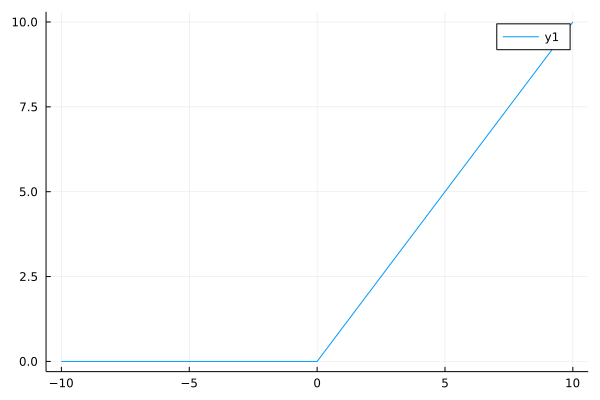

In [170]:
using Plots
z = range(-10, step=1, stop=10)
plot(z, R.(z))

Now, we examine the output types of our function.

In [171]:
println("typeof(R(-2)) = $(typeof(R(-2))).")
println("typeof(R(2)) = $(typeof(R(2))).")

println("typeof(R(-2.0)) = $(typeof(R(-2.0))).")
println("typeof(R(2.0)) = $(typeof(R(2.0))).")

typeof(R(-2)) = Int64.
typeof(R(2)) = Int64.
typeof(R(-2.0)) = Int64.
typeof(R(2.0)) = Float64.


As we can see, when the argument of the ReLU is 2.0, the type suddenly depends on the value evaluated by the function. Positive arguments tend to have output `Float64` type and negative arguements outputs `Int64` types.

### fixing type-instability

A more tedious route would be manually setting the outputs for a given input

In [172]:
function R_stable(x) 
    if typeof(x) == Float64
        return 0.0
    elseif typeof(x) == Float32
        return Float32(0.0)
    elseif typeof(x) == Int64
        return 0
    end
end

R_stable (generic function with 1 method)

In [173]:
println("typeof(R_stable(-2)) = $(typeof(R_stable(-2))).")
println("typeof(R_stable(2)) = $(typeof(R_stable(2))).")

println("typeof(R_stable(-2.0)) = $(typeof(R_stable(-2.0))).")
println("typeof(R_stable(2.0)) = $(typeof(R_stable(2.0))).")

typeof(R_stable(-2)) = Int64.
typeof(R_stable(2)) = Int64.
typeof(R_stable(-2.0)) = Float64.
typeof(R_stable(2.0)) = Float64.


In [174]:
function R_stable(x) 
    if x < 0
        return zero(x)
    else
        return x
    end
end

R_stable (generic function with 1 method)

In [175]:
println("typeof(R_stable(-2)) = $(typeof(R_stable(-2))).")
println("typeof(R_stable(2)) = $(typeof(R_stable(2))).")

println("typeof(R_stable(-2.0)) = $(typeof(R_stable(-2.0))).")
println("typeof(R_stable(2.0)) = $(typeof(R_stable(2.0))).")

typeof(R_stable(-2)) = Int64.
typeof(R_stable(2)) = Int64.
typeof(R_stable(-2.0)) = Float64.
typeof(R_stable(2.0)) = Float64.


As we can see, the type of the input is well replicated by the output.

## KR5

**Demonstration of how @code_warntype can be useful in detecting type-instabilities.**

In [176]:
?@code_warntype

```
@code_warntype
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_warntype`](@ref) on the resulting expression.


In [177]:
@code_warntype R(2)

Variables
  #self#::Core.Const(R)
  x::Int64

Body::Int64
1 ─ %1 = (x < 0)::Bool
└──      goto #3 if not %1
2 ─      return 0
3 ─      return x


In [178]:
@code_warntype R(2.0)

Variables
  #self#::Core.Const(R)
  x::Float64

Body::Union{Float64, Int64}
1 ─ %1 = (x < 0)::Bool
└──      goto #3 if not %1
2 ─      return 0
3 ─      return x


We can see that the ReLU will have a return type of either `Float64` or `Int64` as shown by the `Body::Union{Float64, Int64}` highlited in red. This particulat line makes the normal ReLU function type-unstable. Whereas using the stable version of the fuction as shown below, the type of the input corresponds to the expected output type, hence it is type-stable.

In [179]:
@code_warntype R_stable(2)

Variables
  #self#::Core.Const(R_stable)
  x::Int64

Body::Int64
1 ─ %1 = (x < 0)::Bool
└──      goto #3 if not %1
2 ─ %3 = Main.zero(x)::Core.Const(0)
└──      return %3
3 ─      return x


In [180]:
@code_warntype R_stable(2.0)

Variables
  #self#::Core.Const(R_stable)
  x::Float64

Body::Float64
1 ─ %1 = (x < 0)::Bool
└──      goto #3 if not %1
2 ─ %3 = Main.zero(x)::Core.Const(0.0)
└──      return %3
3 ─      return x


In [181]:
using BenchmarkTools

In [182]:
@benchmark for _ in 1:100_000 R(-2.0) end

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  1.200 ns … 114.600 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.300 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.463 ns ±   1.963 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▇ █                                                          
  █▁█▁▂▁▂▁▁▄▁▄▁▂▁▂▁▁▂▁▂▁▂▁▂▁▁▂▁▁▁▂▁▁▂▁▂▁▂▁▂▁▁▁▁▂▁▂▁▂▁▁▁▁▂▁▂▁▂ ▂
  1.2 ns          Histogram: frequency by time         3.8 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [183]:
@benchmark for _ in 1:100_000 R_stable(-2.0) end

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  1.200 ns … 93.300 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.300 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.496 ns ±  2.061 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █ ▂▄                                                       ▁
  █████▆▅▆▅▄▅▄▄▅▆▅▅▃▅▄▁▅▃▄▄▅▅▁▃▃▄▄▃▃▁▁▃▄▁▄▄▄▄▄▃▃▃▄▃▁▁▃▁▄▄▄▅▅ █
  1.2 ns       Histogram: log(frequency) by time      8.6 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

## KR6

**Demonstration of how Arrays containing ambiguous/abstract types often results to slow execution of codes. The BenchmarkTools may be useful in this part.**

In [184]:
function sumsqrtn_naive(n)
    ret = 0
    for x in 1:n
        ret = ret + sqrt(x)
    end
end

sumsqrtn_naive (generic function with 1 method)

In [185]:
# Cleaner code, sqrt() <: AbstractFloat
function sumsqrtn_clean(n)
    ret = 0.0
    for x in 1:n
        ret = ret + sqrt(x)
    end
end

sumsqrtn_clean (generic function with 1 method)

In [186]:
mark1 = @benchmark sumsqrtn_naive(1_000_000)

BenchmarkTools.Trial: 8686 samples with 1 evaluation.
 Range (min … max):  487.800 μs …   1.360 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     524.000 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   568.875 μs ± 115.002 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▄▂▅▄▃▄▄▃▃▃▃▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁                                  ▁
  ██████████████████████████████████▇██▇█▇▇▆▆▇▆▅▇▆▅▆▅▆▅▅▄▆▄▅▆▅▆ █
  488 μs        Histogram: log(frequency) by time       1.01 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [187]:
mark2 = @benchmark sumsqrtn_clean(1_000_000)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  1.200 ns … 126.800 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.300 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.518 ns ±   2.177 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▃█                                                           
  ██▂▄▆▃▂▁▂▂▂▂▂▂▁▂▁▂▂▂▂▂▁▂▂▂▁▂▂▁▂▂▂▁▂▂▁▂▁▂▁▂▂▁▁▁▂▁▂▂▂▁▁▂▂▁▂▁▂ ▂
  1.2 ns          Histogram: frequency by time         6.3 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [188]:
median(mark1.times) / median(mark2.times)

403076.92307692306

On the first function `sumsqrtn_naive(n)`, the initial value `ret=0` is an integer but it passes on an a squareroot which includes mostly results in a float type. This results to type-instability and as we can see from the benchmarks, it turned out to have way slower execution time. As for the second function, `sumsqrtn_clean(n)` consistently passes on a float type and hence the execution is way smoother. 

In [189]:
println("As a matter of fact, sumsqrtn_clean(n) is $(median(mark1.times) / median(mark2.times))x faster than sumsqrtn_naive(n).")

As a matter of fact, sumsqrtn_clean(n) is 403076.92307692306x faster than sumsqrtn_naive(n).


In [190]:
@code_warntype sumsqrtn_naive(10)

Variables
  #self#::Core.Const(sumsqrtn_naive)
  n::Int64
  @_3::Union{Nothing, Tuple{Int64, Int64}}
  ret::Union{Float64, Int64}
  x::Int64

Body::Nothing
1 ─       (ret = 0)
│   %2  = (1:n)::Core.PartialStruct(UnitRange{Int64}, Any[Core.Const(1), Int64])
│         (@_3 = Base.iterate(%2))
│   %4  = (@_3 === nothing)::Bool
│   %5  = Base.not_int(%4)::Bool
└──       goto #4 if not %5
2 ┄ %7  = @_3::Tuple{Int64, Int64}::Tuple{Int64, Int64}
│         (x = Core.getfield(%7, 1))
│   %9  = Core.getfield(%7, 2)::Int64
│   %10 = ret::Union{Float64, Int64}
│   %11 = Main.sqrt(x)::Float64
│         (ret = %10 + %11)
│         (@_3 = Base.iterate(%2, %9))
│   %14 = (@_3 === nothing)::Bool
│   %15 = Base.not_int(%14)::Bool
└──       goto #4 if not %15
3 ─       goto #2
4 ┄       return nothing


The presence of `::Union{Float64, Int64}` proves that an abstract type is passed and it constitutes to the type-instability.

In [191]:
@code_warntype sumsqrtn_clean(10)

Variables
  #self#::Core.Const(sumsqrtn_clean)
  n::Int64
  @_3::Union{Nothing, Tuple{Int64, Int64}}
  ret::Float64
  x::Int64

Body::Nothing
1 ─       (ret = 0.0)
│   %2  = (1:n)::Core.PartialStruct(UnitRange{Int64}, Any[Core.Const(1), Int64])
│         (@_3 = Base.iterate(%2))
│   %4  = (@_3 === nothing)::Bool
│   %5  = Base.not_int(%4)::Bool
└──       goto #4 if not %5
2 ┄ %7  = @_3::Tuple{Int64, Int64}::Tuple{Int64, Int64}
│         (x = Core.getfield(%7, 1))
│   %9  = Core.getfield(%7, 2)::Int64
│   %10 = ret::Float64
│   %11 = Main.sqrt(x)::Float64
│         (ret = %10 + %11)
│         (@_3 = Base.iterate(%2, %9))
│   %14 = (@_3 === nothing)::Bool
│   %15 = Base.not_int(%14)::Bool
└──       goto #4 if not %15
3 ─       goto #2
4 ┄       return nothing


In [192]:
function sumsqrtn_clner(n)
    ret = 0.0
    for x in 1:n
        ret = ret + sqrt(1.0*n) 
    end
end

sumsqrtn_clner (generic function with 1 method)

This version of the function forces the passed arguments into a float type as manifested by the presence of 1.0 multiplicand inside the square root operation.

In [193]:
@code_warntype sumsqrtn_clner(10)

Variables
  #self#::Core.Const(sumsqrtn_clner)
  n::Int64
  @_3::Union{Nothing, Tuple{Int64, Int64}}
  ret::Float64
  x::Int64

Body::Nothing
1 ─       (ret = 0.0)
│   %2  = (1:n)::Core.PartialStruct(UnitRange{Int64}, Any[Core.Const(1), Int64])
│         (@_3 = Base.iterate(%2))
│   %4  = (@_3 === nothing)::Bool
│   %5  = Base.not_int(%4)::Bool
└──       goto #4 if not %5
2 ┄ %7  = @_3::Tuple{Int64, Int64}::Tuple{Int64, Int64}
│         (x = Core.getfield(%7, 1))
│   %9  = Core.getfield(%7, 2)::Int64
│   %10 = ret::Float64
│   %11 = (1.0 * n)::Float64
│   %12 = Main.sqrt(%11)::Float64
│         (ret = %10 + %12)
│         (@_3 = Base.iterate(%2, %9))
│   %15 = (@_3 === nothing)::Bool
│   %16 = Base.not_int(%15)::Bool
└──       goto #4 if not %16
3 ─       goto #2
4 ┄       return nothing


In [194]:
mark3 = @benchmark sumsqrtn_clner(1_000_000)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  1.200 ns … 42.500 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.300 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.425 ns ±  1.464 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █ ▁▂                                                       ▁
  █████▅▄▄▅▆▁▄▃▁▆▃▄▄▃▄▃▁▁▃▄▄▁▁▃▁▁▄▁▁▃▁▁▁▃▁▁▁▁▁▁▁▁▁▃▁▃▁▁▃▁▁▃▅ █
  1.2 ns       Histogram: log(frequency) by time      8.2 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [195]:
println("mark1/mark2 = $(median(mark1.times) / median(mark2.times))")
println("mark2/mark3 = $(median(mark2.times) / median(mark3.times))")

mark1/mark2 = 403076.92307692306
mark2/mark3 = 1.0


As we can see, `sumsqrtn_clean(10)` works similarly with `sumsqrtn_clner(10)` as shown by the same runtime.